<a href="https://colab.research.google.com/github/ALAIKBITTUQOH/Alaik-Bittuqoh-/blob/main/23422033_Alaik_Bittuqoh_UTS_pengolahan_citra_digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Obito-Uchiha.jpg to Obito-Uchiha (2).jpg


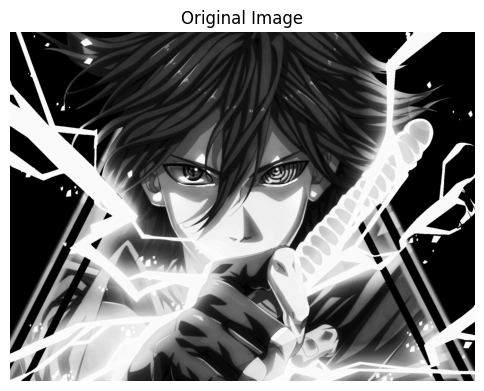

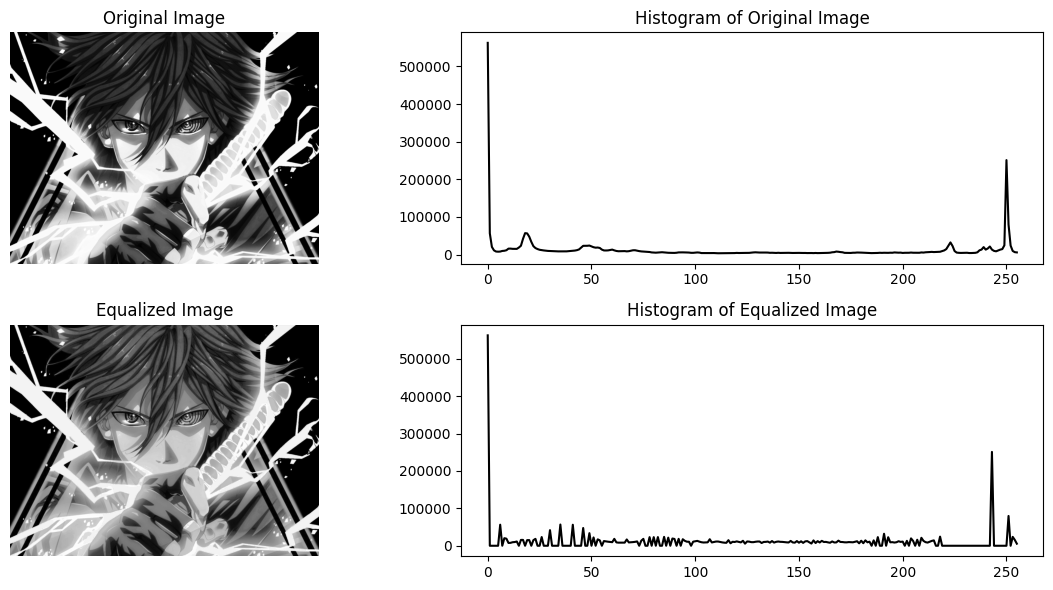

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

# Upload file gambar
uploaded = files.upload()

# Memuat gambar yang diunggah
for filename in uploaded.keys():
    image = Image.open(BytesIO(uploaded[filename])).convert('L')
    image_np = np.array(image)

# Menampilkan gambar asli
plt.figure(figsize=(6, 6))
plt.imshow(image_np, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

# Langkah 1: Inisialisasi histogram
h = np.zeros(256, dtype=int)

# Langkah 2: Menghitung histogram gambar asli
for i in range(image_np.shape[0]):
    for j in range(image_np.shape[1]):
        intensity = image_np[i, j]
        h[intensity] += 1

# Langkah 3: Menghitung histogram kumulatif
h_cumulative = np.zeros(256, dtype=int)
h_cumulative[0] = h[0]
for i in range(1, 256):
    h_cumulative[i] = h_cumulative[i - 1] + h[i]

# Langkah 4: Normalisasi histogram kumulatif
num_pixels = image_np.size
h_normalized = np.round((h_cumulative - h_cumulative.min()) / (num_pixels - h_cumulative.min()) * 255).astype(int)

# Langkah 5: Membuat gambar yang telah diequalisasi
equalized_image = np.zeros_like(image_np)
for i in range(image_np.shape[0]):
    for j in range(image_np.shape[1]):
        equalized_image[i, j] = h_normalized[image_np[i, j]]

# Menghitung histogram dari gambar yang telah diequalisasi
hist_eq, _ = np.histogram(equalized_image.flatten(), 256, [0, 256])

# Langkah 6: Menampilkan hasil
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(2, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Histogram Gambar Asli
plt.subplot(2, 2, 2)
plt.plot(h, color='black')
plt.title("Histogram of Original Image")

# Gambar yang telah diequalisasi
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

# Histogram Gambar yang telah diequalisasi
plt.subplot(2, 2, 4)
plt.plot(hist_eq, color='black')
plt.title("Histogram of Equalized Image")

plt.tight_layout()
plt.show()
